In [1]:
import numpy as np
import torch

seed = 42 #424
np.random.seed(seed)
torch.manual_seed(seed)
#NOTE! This only works for non cudnn. gpu needs
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False

from helpers import showcase_code

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
# for working with external files, otherwise kernels needs to be restarted each time
%load_ext autoreload
%autoreload 2


# Measures

## NLPD

## Error

## cobeau
 
## coverage ?

## distance from 'optimally informed Tsomething' (DOIT)


# experiment

## setup



### toy problem
parameters were obtained via non-exhaustive gridsearch, since the performance on the error is not the most important metric, the other metrics were not optimized for.

#### 100 times per model:


for i in range experiment:
  seed = f(i)
  model = new_model(seed=f(i))
  model.fit(X_train,y_train)
  outcomes = model.get_uncertainty(X_test,y_test)
  measures.append(get_measures(outcomes))
  
stats = mean/std(measures)
  
#### comparisson models:

##### optimal model

##### mean/std model

### kaggle problem


#### 100 times per model:


for i in range experiment:
  seed = f(i)
  model = new_model(seed=f(i))
  model.fit(X_train,y_train)
  outcomes = model.get_uncertainty(X_test,y_test)
  measures.append(get_measures(outcomes))
  
stats = mean/std(measures)

In [3]:
showcase_code('measures.py',showcase=True)

# Toy Problem

In [4]:
from data_loaders import get_X_y, generate_y
from measures import compute_cobeau, compute_nlpd, compute_error

from helpers import plot_uncertainty

In [5]:
toy = True

num_epochs = 300
if toy:
    num_epochs = 2000

num_experiments = 100


In [6]:
from nn_models.models import SaverModel, BobstrapEnsemble, DropoutModel
from nn_models.base_ensemble import VanillaEnsemble
from nn_models.ensembles import BootstrapEnsemble, ShuffleEnsemble

# Done toy BootstrapEnsemble, BobstrapEnsemble, SaverModel, ShuffleEnsemble, DropoutModel
# todo toy   VanillaEnsemble,

iters = 100
l2 = 1
n_std = 4

In [7]:
from experimentation import Experimentator

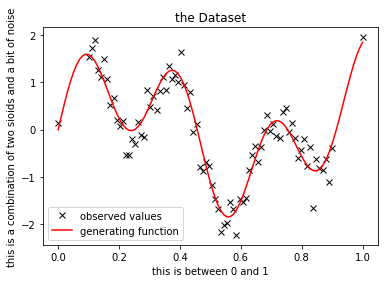

In [8]:
exp = Experimentator(num_experiments,num_epochs,DropoutModel,toy,seed=seed,generator_function = generate_y)

__init__() got an unexpected keyword argument 'save_path'
__init__() got an unexpected keyword argument 'dataset_lenght'


100%|██████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 4346.83it/s]


the training for 2000 took 2.813507318496704 


100%|██████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 3333.47it/s]


__init__() got an unexpected keyword argument 'save_path'
__init__() got an unexpected keyword argument 'dataset_lenght'


100%|██████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 3333.50it/s]


the training for 2000 took 3.6160008907318115 


100%|██████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 2631.52it/s]


__init__() got an unexpected keyword argument 'save_path'
__init__() got an unexpected keyword argument 'dataset_lenght'


100%|██████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 2941.41it/s]


the training for 2000 took 3.600999116897583 


100%|██████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 3571.38it/s]


__init__() got an unexpected keyword argument 'save_path'
__init__() got an unexpected keyword argument 'dataset_lenght'


100%|██████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 2564.12it/s]


the training for 2000 took 2.998992681503296 


100%|██████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 2941.43it/s]


__init__() got an unexpected keyword argument 'save_path'
__init__() got an unexpected keyword argument 'dataset_lenght'


100%|██████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 2857.27it/s]


the training for 2000 took 3.065999746322632 


100%|██████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 2941.33it/s]


__init__() got an unexpected keyword argument 'save_path'
__init__() got an unexpected keyword argument 'dataset_lenght'


100%|██████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 2564.32it/s]


the training for 2000 took 3.0580012798309326 


100%|██████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 2857.17it/s]


__init__() got an unexpected keyword argument 'save_path'
__init__() got an unexpected keyword argument 'dataset_lenght'


100%|██████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 3125.09it/s]


the training for 2000 took 3.1569998264312744 


100%|██████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 2856.98it/s]


__init__() got an unexpected keyword argument 'save_path'
__init__() got an unexpected keyword argument 'dataset_lenght'


100%|██████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 2499.76it/s]


the training for 2000 took 3.150999069213867 


100%|██████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 2777.94it/s]


__init__() got an unexpected keyword argument 'save_path'
__init__() got an unexpected keyword argument 'dataset_lenght'


100%|██████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 2632.02it/s]


the training for 2000 took 3.1519975662231445 


100%|██████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 2777.91it/s]


__init__() got an unexpected keyword argument 'save_path'
__init__() got an unexpected keyword argument 'dataset_lenght'


100%|██████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 2702.93it/s]


the training for 2000 took 3.146998405456543 


100%|██████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 3125.23it/s]


__init__() got an unexpected keyword argument 'save_path'
__init__() got an unexpected keyword argument 'dataset_lenght'


100%|██████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 2703.82it/s]


the training for 2000 took 3.097998857498169 


100%|██████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 3029.67it/s]


__init__() got an unexpected keyword argument 'save_path'
__init__() got an unexpected keyword argument 'dataset_lenght'


100%|██████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 2941.27it/s]


the training for 2000 took 3.1549980640411377 


100%|██████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 2777.46it/s]


__init__() got an unexpected keyword argument 'save_path'
__init__() got an unexpected keyword argument 'dataset_lenght'


100%|██████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 2500.12it/s]


the training for 2000 took 3.855297803878784 


100%|██████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 2563.93it/s]


__init__() got an unexpected keyword argument 'save_path'
__init__() got an unexpected keyword argument 'dataset_lenght'


100%|██████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 2040.81it/s]


the training for 2000 took 3.7819974422454834 


100%|██████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 2564.10it/s]


__init__() got an unexpected keyword argument 'save_path'
__init__() got an unexpected keyword argument 'dataset_lenght'


100%|██████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 2778.00it/s]


the training for 2000 took 3.191999673843384 


100%|██████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 2941.41it/s]


__init__() got an unexpected keyword argument 'save_path'
__init__() got an unexpected keyword argument 'dataset_lenght'


100%|██████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 2631.98it/s]


the training for 2000 took 3.232999563217163 


100%|██████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 2702.69it/s]


__init__() got an unexpected keyword argument 'save_path'
__init__() got an unexpected keyword argument 'dataset_lenght'


100%|██████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 1923.08it/s]


the training for 2000 took 3.4379990100860596 


100%|██████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 2857.12it/s]


__init__() got an unexpected keyword argument 'save_path'
__init__() got an unexpected keyword argument 'dataset_lenght'


100%|██████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 2702.65it/s]


the training for 2000 took 3.404999017715454 


100%|██████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 2702.71it/s]


__init__() got an unexpected keyword argument 'save_path'
__init__() got an unexpected keyword argument 'dataset_lenght'


100%|██████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 2703.00it/s]


the training for 2000 took 3.367509365081787 


100%|██████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 2631.47it/s]


__init__() got an unexpected keyword argument 'save_path'
__init__() got an unexpected keyword argument 'dataset_lenght'


100%|██████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 2940.96it/s]


the training for 2000 took 3.380002975463867 


100%|██████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 2702.88it/s]


__init__() got an unexpected keyword argument 'save_path'
__init__() got an unexpected keyword argument 'dataset_lenght'


100%|██████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 2631.79it/s]


the training for 2000 took 3.177999973297119 


100%|██████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 2631.69it/s]


__init__() got an unexpected keyword argument 'save_path'
__init__() got an unexpected keyword argument 'dataset_lenght'


100%|██████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 2499.99it/s]


the training for 2000 took 3.1669931411743164 


100%|██████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 2857.29it/s]


__init__() got an unexpected keyword argument 'save_path'
__init__() got an unexpected keyword argument 'dataset_lenght'


100%|██████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 2857.80it/s]


the training for 2000 took 3.1619999408721924 


100%|██████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 2857.23it/s]


__init__() got an unexpected keyword argument 'save_path'
__init__() got an unexpected keyword argument 'dataset_lenght'


100%|██████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 2703.02it/s]


the training for 2000 took 3.154998540878296 


100%|██████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 2702.74it/s]


__init__() got an unexpected keyword argument 'save_path'
__init__() got an unexpected keyword argument 'dataset_lenght'


100%|██████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 2631.82it/s]


the training for 2000 took 3.1730003356933594 


100%|██████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 2040.76it/s]


__init__() got an unexpected keyword argument 'save_path'
__init__() got an unexpected keyword argument 'dataset_lenght'


100%|██████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 1999.98it/s]


the training for 2000 took 4.270997047424316 


100%|██████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 1999.85it/s]


__init__() got an unexpected keyword argument 'save_path'
__init__() got an unexpected keyword argument 'dataset_lenght'


100%|██████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 2040.80it/s]


the training for 2000 took 4.2269957065582275 


100%|██████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 1918.38it/s]


__init__() got an unexpected keyword argument 'save_path'
__init__() got an unexpected keyword argument 'dataset_lenght'


100%|██████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 2127.58it/s]


the training for 2000 took 4.170997858047485 


100%|██████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 2083.40it/s]


__init__() got an unexpected keyword argument 'save_path'
__init__() got an unexpected keyword argument 'dataset_lenght'


100%|██████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 1694.81it/s]


the training for 2000 took 4.174000263214111 


100%|██████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 1960.77it/s]


__init__() got an unexpected keyword argument 'save_path'
__init__() got an unexpected keyword argument 'dataset_lenght'


100%|██████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 1886.69it/s]


the training for 2000 took 5.774992227554321 


100%|██████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 2000.02it/s]


__init__() got an unexpected keyword argument 'save_path'
__init__() got an unexpected keyword argument 'dataset_lenght'


100%|██████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 2222.36it/s]


the training for 2000 took 4.236000061035156 


100%|██████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 1923.06it/s]


__init__() got an unexpected keyword argument 'save_path'
__init__() got an unexpected keyword argument 'dataset_lenght'


100%|██████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 2040.38it/s]


the training for 2000 took 4.19999623298645 


100%|██████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 2083.47it/s]


__init__() got an unexpected keyword argument 'save_path'
__init__() got an unexpected keyword argument 'dataset_lenght'


100%|██████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 1886.87it/s]


the training for 2000 took 4.550997972488403 


100%|██████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 2040.85it/s]


__init__() got an unexpected keyword argument 'save_path'
__init__() got an unexpected keyword argument 'dataset_lenght'


100%|██████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 1999.94it/s]


the training for 2000 took 4.263000011444092 


100%|██████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 1960.78it/s]


__init__() got an unexpected keyword argument 'save_path'
__init__() got an unexpected keyword argument 'dataset_lenght'


100%|██████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 1999.93it/s]


the training for 2000 took 4.201000213623047 


100%|██████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 2173.91it/s]


__init__() got an unexpected keyword argument 'save_path'
__init__() got an unexpected keyword argument 'dataset_lenght'


100%|██████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 1851.82it/s]


the training for 2000 took 4.174997568130493 


100%|██████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 2083.38it/s]


__init__() got an unexpected keyword argument 'save_path'
__init__() got an unexpected keyword argument 'dataset_lenght'


100%|██████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 2083.37it/s]


the training for 2000 took 4.182513952255249 


100%|██████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 1851.77it/s]


__init__() got an unexpected keyword argument 'save_path'
__init__() got an unexpected keyword argument 'dataset_lenght'


100%|██████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 1886.67it/s]


the training for 2000 took 4.238996505737305 


100%|██████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 1923.12it/s]


__init__() got an unexpected keyword argument 'save_path'
__init__() got an unexpected keyword argument 'dataset_lenght'


100%|██████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 2083.36it/s]


the training for 2000 took 4.19999885559082 


100%|██████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 2127.74it/s]


__init__() got an unexpected keyword argument 'save_path'
__init__() got an unexpected keyword argument 'dataset_lenght'


100%|██████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 1785.88it/s]


the training for 2000 took 4.176995515823364 


100%|██████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 2040.84it/s]


__init__() got an unexpected keyword argument 'save_path'
__init__() got an unexpected keyword argument 'dataset_lenght'


100%|██████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 1886.72it/s]


the training for 2000 took 4.139000654220581 


100%|██████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 2173.95it/s]


__init__() got an unexpected keyword argument 'save_path'
__init__() got an unexpected keyword argument 'dataset_lenght'


100%|██████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 2121.02it/s]


the training for 2000 took 4.14499831199646 


100%|██████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 2222.34it/s]


__init__() got an unexpected keyword argument 'save_path'
__init__() got an unexpected keyword argument 'dataset_lenght'


100%|██████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 1960.86it/s]


the training for 2000 took 5.488636255264282 


100%|██████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 1136.35it/s]


__init__() got an unexpected keyword argument 'save_path'
__init__() got an unexpected keyword argument 'dataset_lenght'


100%|██████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 1724.16it/s]


the training for 2000 took 4.532508850097656 


100%|██████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 2222.31it/s]


__init__() got an unexpected keyword argument 'save_path'
__init__() got an unexpected keyword argument 'dataset_lenght'


100%|██████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 2173.45it/s]


the training for 2000 took 4.230000257492065 


100%|██████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 1960.71it/s]


__init__() got an unexpected keyword argument 'save_path'
__init__() got an unexpected keyword argument 'dataset_lenght'


100%|██████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 2040.91it/s]


the training for 2000 took 4.1619977951049805 


100%|██████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 2083.38it/s]


__init__() got an unexpected keyword argument 'save_path'
__init__() got an unexpected keyword argument 'dataset_lenght'


100%|██████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 1818.30it/s]


the training for 2000 took 4.20199990272522 


100%|██████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 2083.33it/s]


__init__() got an unexpected keyword argument 'save_path'
__init__() got an unexpected keyword argument 'dataset_lenght'


100%|██████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 2083.41it/s]


the training for 2000 took 4.107998609542847 


100%|██████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 1999.83it/s]


__init__() got an unexpected keyword argument 'save_path'
__init__() got an unexpected keyword argument 'dataset_lenght'


100%|██████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 1960.45it/s]


the training for 2000 took 4.150996208190918 


100%|██████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 2222.12it/s]


__init__() got an unexpected keyword argument 'save_path'
__init__() got an unexpected keyword argument 'dataset_lenght'


100%|██████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 1886.80it/s]


the training for 2000 took 4.130996465682983 


100%|██████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 2000.11it/s]


__init__() got an unexpected keyword argument 'save_path'
__init__() got an unexpected keyword argument 'dataset_lenght'


100%|██████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 2222.44it/s]


the training for 2000 took 4.134999513626099 


100%|██████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 2174.00it/s]


__init__() got an unexpected keyword argument 'save_path'
__init__() got an unexpected keyword argument 'dataset_lenght'


100%|██████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 2272.87it/s]


the training for 2000 took 4.142001390457153 


100%|██████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 2127.63it/s]


__init__() got an unexpected keyword argument 'save_path'
__init__() got an unexpected keyword argument 'dataset_lenght'


100%|██████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 2173.92it/s]


the training for 2000 took 4.209996938705444 


100%|██████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 2083.25it/s]


__init__() got an unexpected keyword argument 'save_path'
__init__() got an unexpected keyword argument 'dataset_lenght'


100%|██████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 1960.91it/s]


the training for 2000 took 4.22200083732605 


100%|██████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 2040.71it/s]


__init__() got an unexpected keyword argument 'save_path'
__init__() got an unexpected keyword argument 'dataset_lenght'


100%|██████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 1851.74it/s]


the training for 2000 took 4.190998792648315 


100%|██████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 1818.28it/s]


__init__() got an unexpected keyword argument 'save_path'
__init__() got an unexpected keyword argument 'dataset_lenght'


100%|██████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 2040.84it/s]


the training for 2000 took 4.137509822845459 


100%|██████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 1960.65it/s]


__init__() got an unexpected keyword argument 'save_path'
__init__() got an unexpected keyword argument 'dataset_lenght'


100%|██████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 1298.71it/s]


the training for 2000 took 5.494998455047607 


100%|██████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 1914.94it/s]


__init__() got an unexpected keyword argument 'save_path'
__init__() got an unexpected keyword argument 'dataset_lenght'


100%|██████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 1694.93it/s]


the training for 2000 took 4.111997604370117 


100%|██████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 1999.97it/s]


__init__() got an unexpected keyword argument 'save_path'
__init__() got an unexpected keyword argument 'dataset_lenght'


100%|██████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 2083.53it/s]


the training for 2000 took 4.192999601364136 


100%|██████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 1960.55it/s]


__init__() got an unexpected keyword argument 'save_path'
__init__() got an unexpected keyword argument 'dataset_lenght'


100%|██████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 1851.73it/s]


the training for 2000 took 4.187999486923218 


100%|██████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 1923.08it/s]


__init__() got an unexpected keyword argument 'save_path'
__init__() got an unexpected keyword argument 'dataset_lenght'


100%|██████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 2083.35it/s]


the training for 2000 took 4.070511102676392 


100%|██████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 2222.29it/s]


__init__() got an unexpected keyword argument 'save_path'
__init__() got an unexpected keyword argument 'dataset_lenght'


100%|██████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 2083.40it/s]


the training for 2000 took 3.791999578475952 


100%|██████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 2127.60it/s]


__init__() got an unexpected keyword argument 'save_path'
__init__() got an unexpected keyword argument 'dataset_lenght'


100%|██████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 2000.08it/s]


the training for 2000 took 4.00199556350708 


100%|██████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 2325.49it/s]


__init__() got an unexpected keyword argument 'save_path'
__init__() got an unexpected keyword argument 'dataset_lenght'


100%|██████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 2127.63it/s]


the training for 2000 took 3.8759994506835938 


100%|██████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 2040.70it/s]


__init__() got an unexpected keyword argument 'save_path'
__init__() got an unexpected keyword argument 'dataset_lenght'


100%|██████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 2127.47it/s]


the training for 2000 took 4.09498929977417 


100%|██████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 2380.84it/s]


__init__() got an unexpected keyword argument 'save_path'
__init__() got an unexpected keyword argument 'dataset_lenght'


100%|██████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 2173.97it/s]


the training for 2000 took 4.033000469207764 


100%|██████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 1994.35it/s]


__init__() got an unexpected keyword argument 'save_path'
__init__() got an unexpected keyword argument 'dataset_lenght'


100%|██████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 2127.75it/s]


the training for 2000 took 3.9800000190734863 


100%|██████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 1923.15it/s]


__init__() got an unexpected keyword argument 'save_path'
__init__() got an unexpected keyword argument 'dataset_lenght'


100%|██████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 2000.00it/s]


the training for 2000 took 4.06799840927124 


100%|██████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 1960.77it/s]


__init__() got an unexpected keyword argument 'save_path'
__init__() got an unexpected keyword argument 'dataset_lenght'


100%|██████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 1999.99it/s]


the training for 2000 took 4.249998331069946 


100%|██████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 2325.07it/s]


__init__() got an unexpected keyword argument 'save_path'
__init__() got an unexpected keyword argument 'dataset_lenght'


100%|██████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 2040.87it/s]


the training for 2000 took 4.078001022338867 


100%|██████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 1785.81it/s]


__init__() got an unexpected keyword argument 'save_path'
__init__() got an unexpected keyword argument 'dataset_lenght'


100%|██████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 1886.60it/s]


the training for 2000 took 5.58337140083313 


100%|██████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 2127.64it/s]


__init__() got an unexpected keyword argument 'save_path'
__init__() got an unexpected keyword argument 'dataset_lenght'


100%|██████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 2040.77it/s]


the training for 2000 took 4.0779993534088135 


100%|██████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 2272.76it/s]


__init__() got an unexpected keyword argument 'save_path'
__init__() got an unexpected keyword argument 'dataset_lenght'


100%|██████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 2040.82it/s]


the training for 2000 took 4.113995313644409 


100%|██████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 2439.03it/s]


__init__() got an unexpected keyword argument 'save_path'
__init__() got an unexpected keyword argument 'dataset_lenght'


100%|██████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 2174.01it/s]


the training for 2000 took 4.107997179031372 


100%|██████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 2173.87it/s]


__init__() got an unexpected keyword argument 'save_path'
__init__() got an unexpected keyword argument 'dataset_lenght'


100%|██████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 2083.47it/s]


the training for 2000 took 4.054998397827148 


100%|██████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 2174.05it/s]


__init__() got an unexpected keyword argument 'save_path'
__init__() got an unexpected keyword argument 'dataset_lenght'


100%|██████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 1923.13it/s]


the training for 2000 took 3.8836002349853516 


100%|██████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 2083.13it/s]


__init__() got an unexpected keyword argument 'save_path'
__init__() got an unexpected keyword argument 'dataset_lenght'


100%|██████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 2222.52it/s]


the training for 2000 took 4.0819993019104 


100%|██████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 2173.71it/s]


__init__() got an unexpected keyword argument 'save_path'
__init__() got an unexpected keyword argument 'dataset_lenght'


100%|██████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 2174.09it/s]


the training for 2000 took 4.185999155044556 


100%|██████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 2500.02it/s]


__init__() got an unexpected keyword argument 'save_path'
__init__() got an unexpected keyword argument 'dataset_lenght'


100%|██████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 2173.85it/s]


the training for 2000 took 3.7359890937805176 


100%|██████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 2439.06it/s]


__init__() got an unexpected keyword argument 'save_path'
__init__() got an unexpected keyword argument 'dataset_lenght'


100%|██████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 2325.72it/s]


the training for 2000 took 3.883999824523926 


100%|██████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 2173.87it/s]


__init__() got an unexpected keyword argument 'save_path'
__init__() got an unexpected keyword argument 'dataset_lenght'


100%|██████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 2083.40it/s]


the training for 2000 took 4.197998285293579 


100%|██████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 2127.66it/s]


__init__() got an unexpected keyword argument 'save_path'
__init__() got an unexpected keyword argument 'dataset_lenght'


100%|██████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 2222.27it/s]


the training for 2000 took 4.197998762130737 


100%|██████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 2000.02it/s]


__init__() got an unexpected keyword argument 'save_path'
__init__() got an unexpected keyword argument 'dataset_lenght'


100%|██████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 2000.03it/s]


the training for 2000 took 4.188998699188232 


100%|██████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 2083.29it/s]


__init__() got an unexpected keyword argument 'save_path'
__init__() got an unexpected keyword argument 'dataset_lenght'


100%|██████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 2127.73it/s]


the training for 2000 took 4.3705995082855225 


100%|██████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 1449.12it/s]


__init__() got an unexpected keyword argument 'save_path'
__init__() got an unexpected keyword argument 'dataset_lenght'


100%|██████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 1075.74it/s]


the training for 2000 took 5.4334716796875 


100%|██████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 2173.67it/s]


__init__() got an unexpected keyword argument 'save_path'
__init__() got an unexpected keyword argument 'dataset_lenght'


100%|██████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 2083.34it/s]


the training for 2000 took 4.192999362945557 


100%|██████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 1999.95it/s]


__init__() got an unexpected keyword argument 'save_path'
__init__() got an unexpected keyword argument 'dataset_lenght'


100%|██████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 1886.86it/s]


the training for 2000 took 4.253997325897217 


100%|██████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 2172.65it/s]


__init__() got an unexpected keyword argument 'save_path'
__init__() got an unexpected keyword argument 'dataset_lenght'


100%|██████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 2272.57it/s]


the training for 2000 took 4.0699968338012695 


100%|██████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 2040.95it/s]


__init__() got an unexpected keyword argument 'save_path'
__init__() got an unexpected keyword argument 'dataset_lenght'


100%|██████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 2173.94it/s]


the training for 2000 took 4.20999813079834 


100%|██████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 2083.29it/s]


__init__() got an unexpected keyword argument 'save_path'
__init__() got an unexpected keyword argument 'dataset_lenght'


100%|██████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 2127.72it/s]


the training for 2000 took 4.105997800827026 


100%|██████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 2222.36it/s]


__init__() got an unexpected keyword argument 'save_path'
__init__() got an unexpected keyword argument 'dataset_lenght'


100%|██████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 1923.09it/s]


the training for 2000 took 4.189994812011719 


100%|██████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 2083.42it/s]


__init__() got an unexpected keyword argument 'save_path'
__init__() got an unexpected keyword argument 'dataset_lenght'


100%|██████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 2173.94it/s]


the training for 2000 took 4.001997947692871 


100%|██████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 2229.48it/s]


__init__() got an unexpected keyword argument 'save_path'
__init__() got an unexpected keyword argument 'dataset_lenght'


100%|██████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 2325.60it/s]


the training for 2000 took 4.022000312805176 


100%|██████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 2499.97it/s]


__init__() got an unexpected keyword argument 'save_path'
__init__() got an unexpected keyword argument 'dataset_lenght'


100%|██████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 2499.94it/s]


the training for 2000 took 3.7659966945648193 


100%|██████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 2325.69it/s]


__init__() got an unexpected keyword argument 'save_path'
__init__() got an unexpected keyword argument 'dataset_lenght'


100%|██████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 2325.70it/s]


the training for 2000 took 3.649996042251587 


100%|██████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 2500.15it/s]


__init__() got an unexpected keyword argument 'save_path'
__init__() got an unexpected keyword argument 'dataset_lenght'


100%|██████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 2438.73it/s]


the training for 2000 took 3.5160000324249268 


100%|██████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 2438.89it/s]


__init__() got an unexpected keyword argument 'save_path'
__init__() got an unexpected keyword argument 'dataset_lenght'


100%|██████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 2564.34it/s]


the training for 2000 took 3.6390018463134766 


100%|██████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 2381.10it/s]


__init__() got an unexpected keyword argument 'save_path'
__init__() got an unexpected keyword argument 'dataset_lenght'


100%|██████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 2325.54it/s]


the training for 2000 took 3.760998010635376 


100%|██████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 2272.79it/s]


__init__() got an unexpected keyword argument 'save_path'
__init__() got an unexpected keyword argument 'dataset_lenght'


100%|██████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 1999.95it/s]


the training for 2000 took 5.849852085113525 


100%|██████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 2082.94it/s]


__init__() got an unexpected keyword argument 'save_path'
__init__() got an unexpected keyword argument 'dataset_lenght'


100%|██████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 2040.85it/s]


the training for 2000 took 4.150998115539551 


100%|██████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 2174.00it/s]


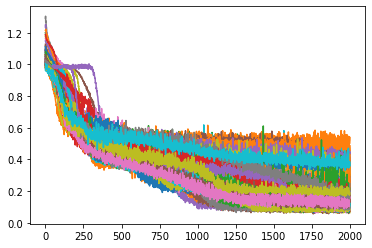

In [9]:
exp.run_experiment()

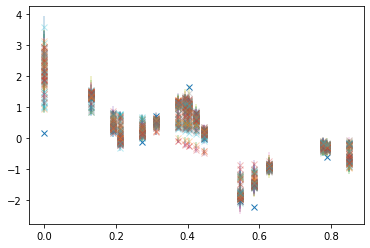

In [10]:
exp.plot_outcomes()

In [11]:
exp.analysis()

0.4075211365046693 0.08026466442014439
0.4380831463662369 0.2723834661967473
0.1983402384930152 0.26624364416004537
-0.26127779348576774 2.3546109394455197


0.4075211365046693 0.08026466442014439
0.4380831463662369 0.2723834661967473
0.1983402384930152 0.26624364416004537
-0.26127779348576774 2.3546109394455197


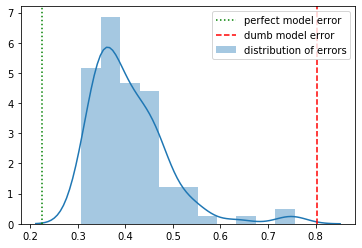

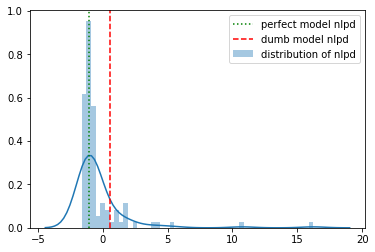

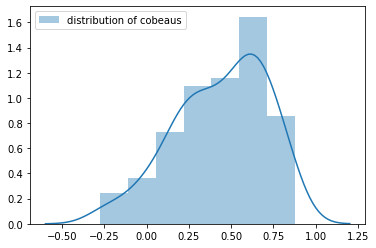

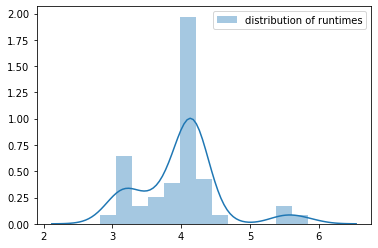

In [12]:
exp.plot_distribution_of_metrics()

53 51


100%|██████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 2325.54it/s]


 this many models: (100, 100)
cobeau: (0.23536101396377151, 0.3631547266377354)
nlpd: -1.4132642662501365.
 nlpds of just mean and just std of the model:
0.5377464136941734


C:\Users\thoma\Documents\GitHub\uncertainty_regression_pytorch\models\measures.py:15: RuntimeWarning: invalid value encountered in log
  nlpd = 1/2 * (y-y_pred)**2 / y_std + np.log(y_std)


nan
error: 0.30975042965516797


100%|██████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 2438.97it/s]


 this many models: (100, 100)
cobeau: (0.3303742808306137, 0.1952701150420782)
nlpd: 1.4267518916809987.
 nlpds of just mean and just std of the model:
0.5377464136941734
nan
error: 0.7574071211453218


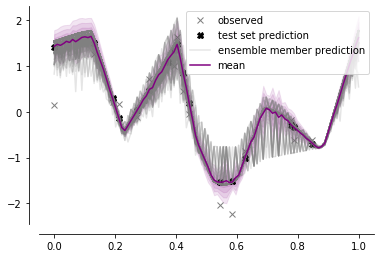

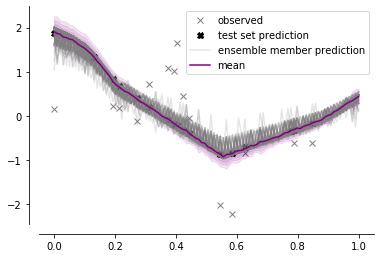

In [13]:
exp.plot_models()

33 24


100%|██████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 2438.85it/s]


 this many models: (100, 100)
cobeau: (-0.3771721389186524, 0.1355849445424807)
nlpd: 0.21962223075900422.
 nlpds of just mean and just std of the model:
0.5377464136941734
nan
error: 0.46898037901691575


100%|██████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 2272.89it/s]


 this many models: (100, 100)
cobeau: (0.6685590384964933, 0.0033457728120369944)
nlpd: -0.8075767729295157.
 nlpds of just mean and just std of the model:
0.5377464136941734
nan
error: 0.4449489475118609


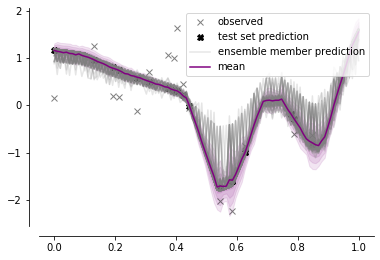

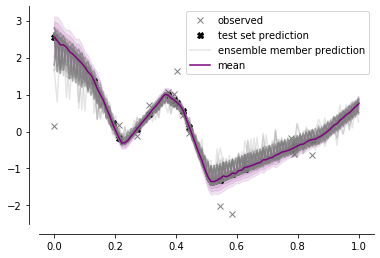

In [14]:
exp.plot_models('cobeau')

87 65


100%|██████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 3125.13it/s]


 this many models: (100, 100)
cobeau: (0.5509775145231286, 0.02188889171729338)
nlpd: -1.5554067584149553.
 nlpds of just mean and just std of the model:
0.5377464136941734
nan
error: 0.31521122306615335


100%|██████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 2127.63it/s]


 this many models: (100, 100)
cobeau: (0.31241802438586375, 0.22213666986750302)
nlpd: 13.353309409425057.
 nlpds of just mean and just std of the model:
0.5377464136941734
nan
error: 0.4688593837916516


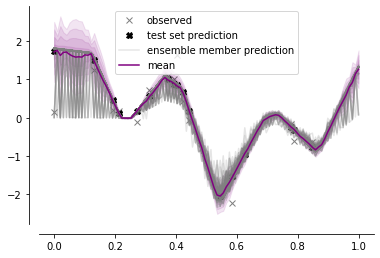

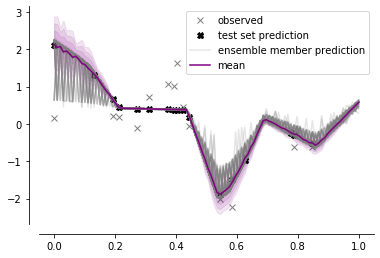

In [15]:
exp.plot_models('nlpd')

In [16]:
exp.stupid_function_error

0.8033239346307726

In [17]:
len(exp.stats_dict['analysis']['cobeau'])

100

In [18]:
len(exp.stats_dict['models'])

100

In [19]:
np.argmin(exp.stats_dict['analysis']['cobeau'])

33

In [20]:
# exp.stats_dict['analysis']['cobeau']

In [21]:
np.argmax([1,2,3])

2

In [22]:
import pickle

save_file = f"pickles\\{exp.model_name}_toy_{toy}_{num_experiments}.pkl"

with open(save_file, "wb") as f:
    pickle.dump(exp, f)

In [23]:
with  open(save_file, "rb") as f:
    exp2 = pickle.load(f)
    

87 65


100%|██████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 2380.99it/s]


 this many models: (100, 100)
cobeau: (0.5496909107209851, 0.0222636475265911)
nlpd: -1.5493992382497768.
 nlpds of just mean and just std of the model:
0.5377464136941734
nan
error: 0.31091196282851574


100%|██████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 2222.29it/s]


 this many models: (100, 100)
cobeau: (0.0694365372516147, 0.7911586805857156)
nlpd: 15.166459390215156.
 nlpds of just mean and just std of the model:
0.5377464136941734
nan
error: 0.4689008256740095


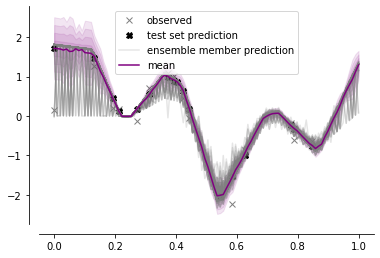

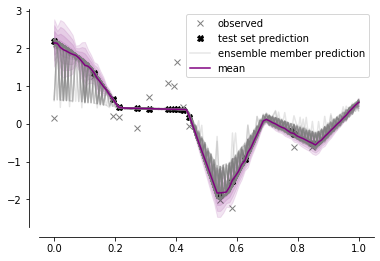

In [24]:
exp2.plot_models('nlpd')

# data analysis



In [25]:
test_string = "<class 'nn_models.models.SaverModel'>"

In [26]:
index_start = test_string.find('.models.')+len('.models.')
index_stop = test_string.find("'>")
new_string = test_string[index_start:index_stop]

In [27]:
new_string = test_string[index_start:index_stop]

In [28]:
new_string

'SaverModel'

In [29]:
type(SaverModel)

type

In [30]:
f'{SaverModel}'

"<class 'nn_models.models.SaverModel'>"